In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; 
import math
dataInfor = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/european-social-survey/variables.csv') #metadata

data = pd.read_csv('/Users/jowi/Desktop/uni/DataMining/DataMining-FinalProject/european-social-survey/ESS8e02.1_F1.csv') #data
#pd.set_option('display.max_colwidth', -1)
#print(data['Question']) <- see all the questions

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
print(data.head(0)) 


Empty DataFrame
Columns: [name, essround, edition, proddate, idno, cntry, nwspol, netusoft, netustm, ppltrst, pplfair, pplhlp, polintr, psppsgva, actrolga, psppipla, cptppola, trstprl, trstlgl, trstplc, trstplt, trstprt, trstep, trstun, vote, prtvtbat, prtvtcbe, prtvtfch, prtvtdcz, prtvede1, prtvede2, prtvtfee, prtvtdes, prtvtdfi, prtvtcfr, prtvtbgb, prtvtehu, prtvtbie, prtvtcil, prtvtbis, prtvtbit, prtvblt1, prtvblt2, prtvblt3, prtvtfnl, prtvtbno, prtvtdpl, prtvtcpt, prtvtdru, prtvtbse, prtvtesi, contplt, wrkprty, wrkorg, badge, sgnptit, pbldmn, bctprd, pstplonl, clsprty, prtclcat, prtclcbe, prtclfch, prtcldcz, prtclede, prtclfee, prtclees, prtcldfi, prtclefr, prtclbgb, prtclfhu, prtcldie, prtcldil, prtclbis, prtclcit, prtclblt, prtclenl, prtclbno, prtclgpl, prtclept, prtcldru, prtclbse, prtclesi, prtdgcl, lrscale, stflife, stfeco, stfgov, stfdem, stfedu, stfhlth, gincdif, mnrgtjb, freehms, hmsfmlsh, hmsacld, euftf, imsmetn, imdfetn, impcntr, ...]
Index: []

[0 rows x 534 columns]


In [3]:
countries = data[['idno','cntry']].groupby('cntry')
#After this operation I get a dataframe wiht idno as a column name anc=d cntry as INDEX

In [4]:
peoplePerCountry = countries.count() #how many people from each country
print(peoplePerCountry)

       idno
cntry      
AT     2010
BE     1766
CH     1525
CZ     2269
DE     2852
EE     2019
ES     1958
FI     1925
FR     2070
GB     1959
HU     1614
IE     2757
IL     2557
IS      880
IT     2626
LT     2122
NL     1681
NO     1545
PL     1694
PT     1270
RU     2430
SE     1551
SI     1307


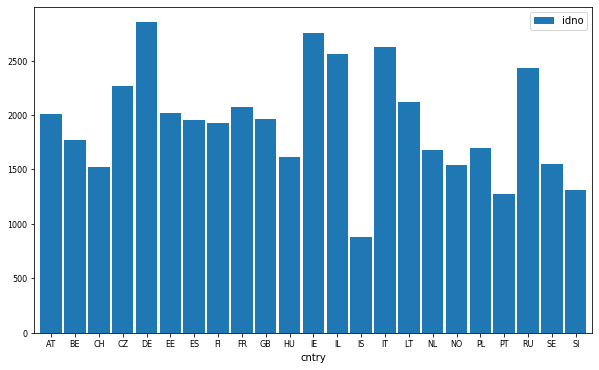

In [5]:
peoplePerCountry.plot.bar(rot=0, fontsize=8, width=0.9, figsize=(10,6))

In [6]:
# in total: 
peoplePerCountry['idno'].sum() #44387 people took participation in the survey

44387

In [7]:
# derive germany and poland:
dataPL = data[ data['cntry'] == 'PL']
dataGE = data[ data['cntry'] == 'GE']

In [8]:
#we choose our label to be column = that asks whether a person is defining themselves as right or left wing:
# column - lrscale - discrete values from 0 to 10 (ten meaning right) 
# only take into consideration 1 to 9 - the rest skew the data (10 Better place to live,77 Refusal,88 Don't know, 99 NA)
#OR  - take mean which should be around 5:

#data['happy'] = data['happy'].replace([77,88,99], 5, inplace=True) <- not working, dunno how to do it
#print(data[['happy','cntry']])
happiness = data[['happy','cntry']].groupby('cntry')
HappinessPerCountry = happiness.mean() 


In [9]:
print(HappinessPerCountry)

          happy
cntry          
AT     7.884577
BE     7.792752
CH     8.280000
CZ     7.068312
DE     7.833100
EE     7.437841
ES     7.940756
FI     8.269091
FR     7.286473
GB     7.671771
HU     6.989467
IE     7.535727
IL     8.492374
IS     8.315909
IT     7.474105
LT     7.913761
NL     8.009518
NO     8.157282
PL     9.640496
PT     7.479528
RU     7.378601
SE     8.292070
SI     7.758225


In [10]:
# Polish are the happiest? dafuq?

In [11]:
attatchmentToCountry = data[['atchctr','cntry']].groupby('cntry')
print(attatchmentToCountry.mean())


        atchctr
cntry          
AT     8.107463
BE     6.638165
CH     8.041967
CZ     7.955046
DE     7.636746
EE     8.176325
ES     8.245148
FI     8.638961
FR     8.185990
GB     7.352731
HU     8.656134
IE     7.958651
IL     8.935862
IS     8.406818
IT     8.293602
LT     9.368992
NL     7.281975
NO     8.369579
PL     8.961039
PT     8.762205
RU     8.659671
SE     8.298517
SI     7.820199
